<a href="https://colab.research.google.com/github/asu2304/dog_vs_cats_identification/blob/main/cats_vs_dogs_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

# usual code
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [14]:
# api command
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall("/content")
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import  keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [20]:
# genertators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels  = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# normalizing the images:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

In [22]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
# creating the CNN models
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [28]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )


In [30]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3742 - accuracy: 0.8269 - val_loss: 0.4520 - val_accuracy: 0.7970
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2547 - accuracy: 0.8910 - val_loss: 0.6094 - val_accuracy: 0.7898
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1522 - accuracy: 0.9401 - val_loss: 0.7119 - val_accuracy: 0.7924
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0975 - accuracy: 0.9638 - val_loss: 0.8304 - val_accuracy: 0.7884
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0717 - accuracy: 0.9740 - val_loss: 1.0341 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 1.4932 - val_accuracy: 0.7792
Epoch 7/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 1.1115 - val_accuracy

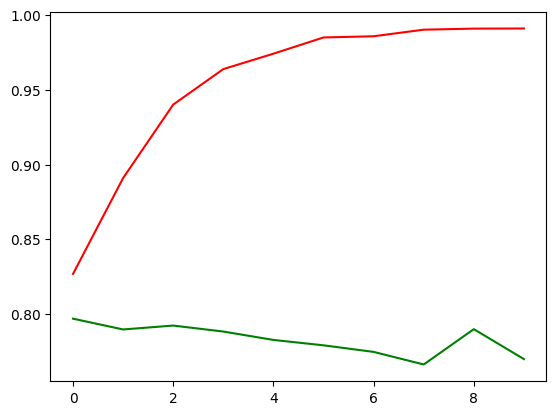

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'train')